In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline

In [7]:
heart_df = pd.read_csv("/Users/Alqama/Downloads/heart (2).csv")

In [31]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [33]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [17]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
heart_df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [23]:
heart_df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


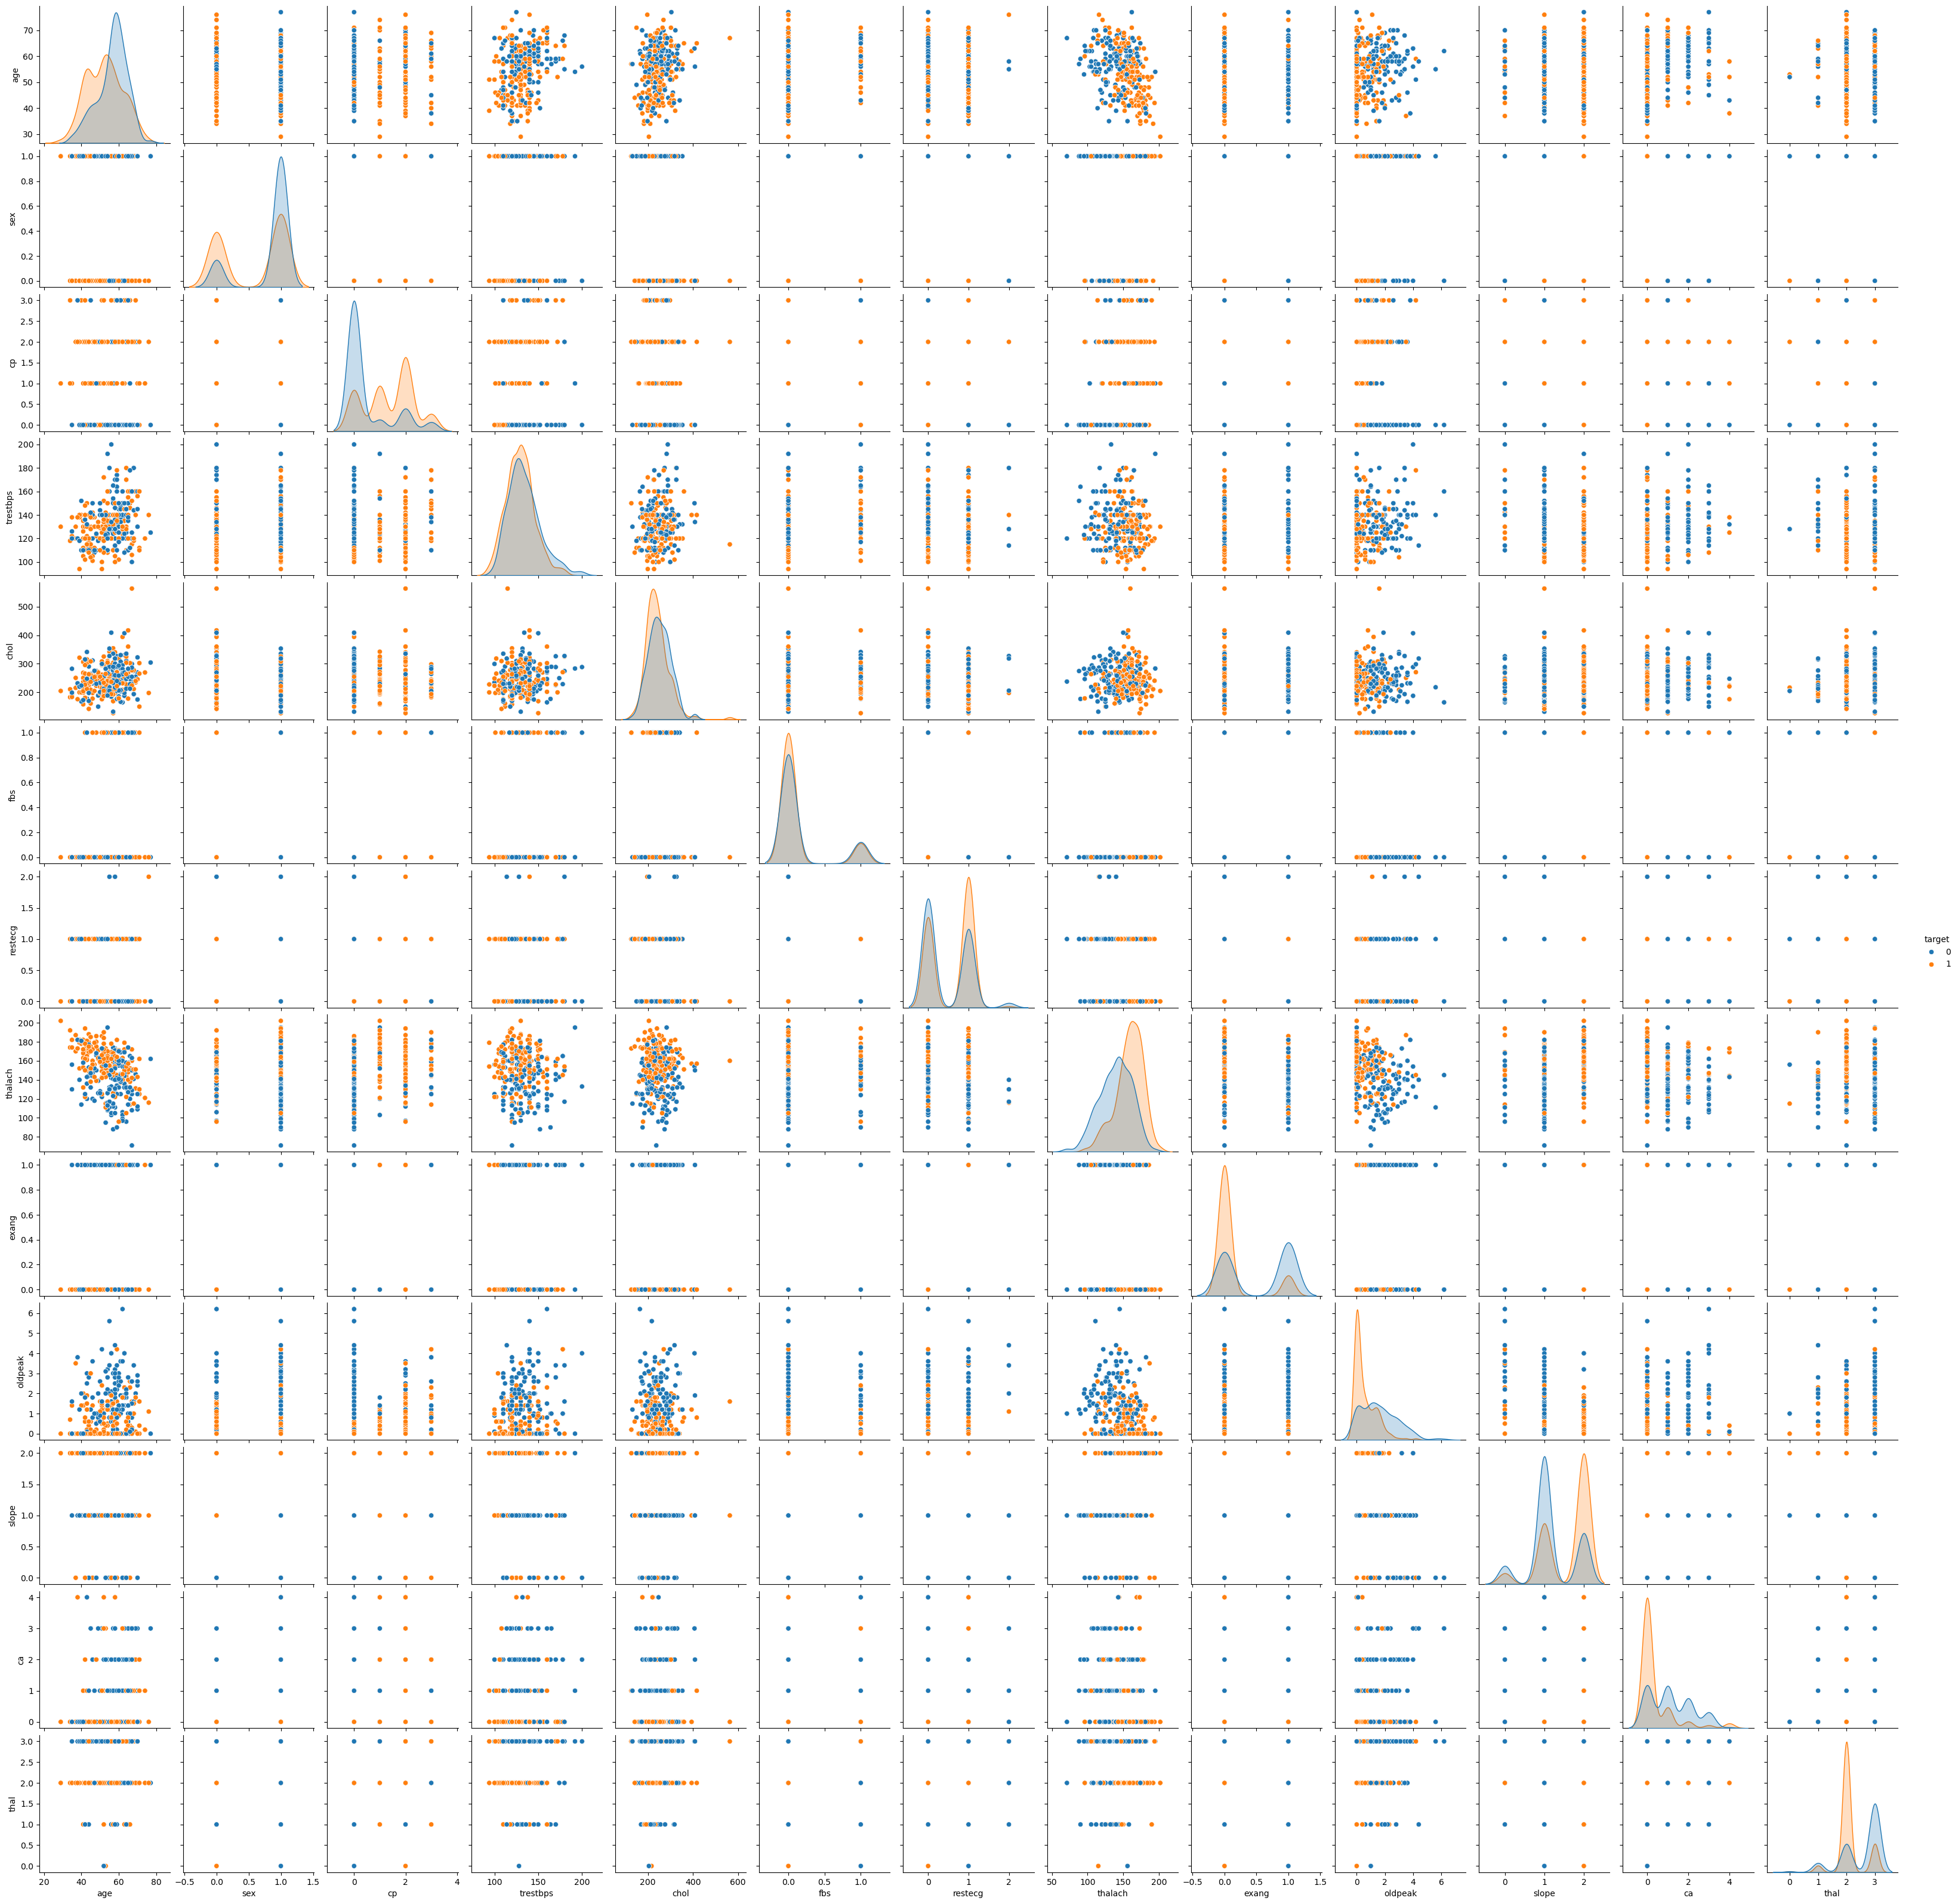

In [27]:
sns.pairplot(heart_df, hue ="target")

C:\Users\Alqama\AppData\Local\Temp\ipykernel_37016\657373067.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heart_df["trestbps"],shade ="fill")


<Axes: xlabel='trestbps', ylabel='Density'>

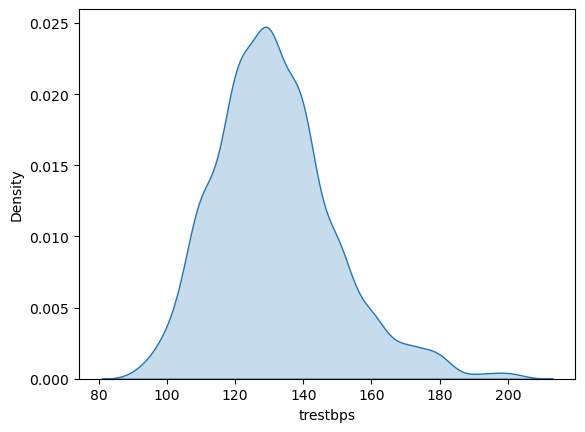

In [99]:
sns.kdeplot(heart_df["trestbps"],shade ="fill")

In [41]:
corr = heart_df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

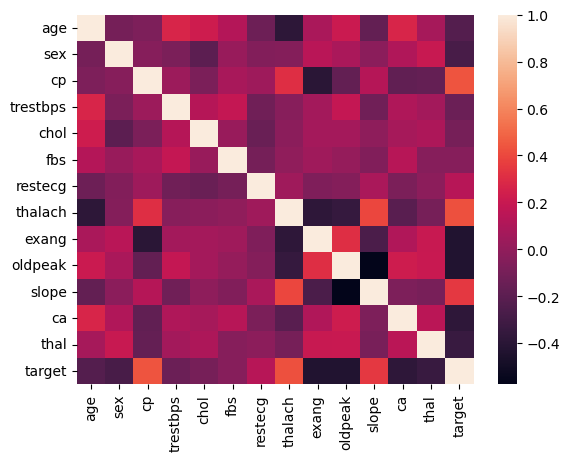

In [43]:
import seaborn as sns
sns.heatmap(corr,)

In [19]:
import numpy as np
import pandas as pd
from scipy import stats

# Load your dataset
df = pd.read_csv('/Users/Alqama/Downloads/heart (2).csv')

# Compute Z-scores for each column
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Set a threshold for outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)
outlier_indices = set(outliers[0])  # Getting unique indices

# Print the indices of outliers
print("Outlier indices:", outlier_indices)

Outlier indices: {128, 641, 393, 521, 267, 14, 526, 151, 665, 158, 417, 290, 294, 296, 428, 685, 686, 175, 559, 688, 179, 52, 54, 55, 958, 319, 192, 831, 450, 833, 69, 326, 329, 970, 208, 464, 465, 83, 340, 597, 348, 734, 481, 993, 996, 613, 359, 743, 749, 242, 246, 889, 378, 123, 508, 893}


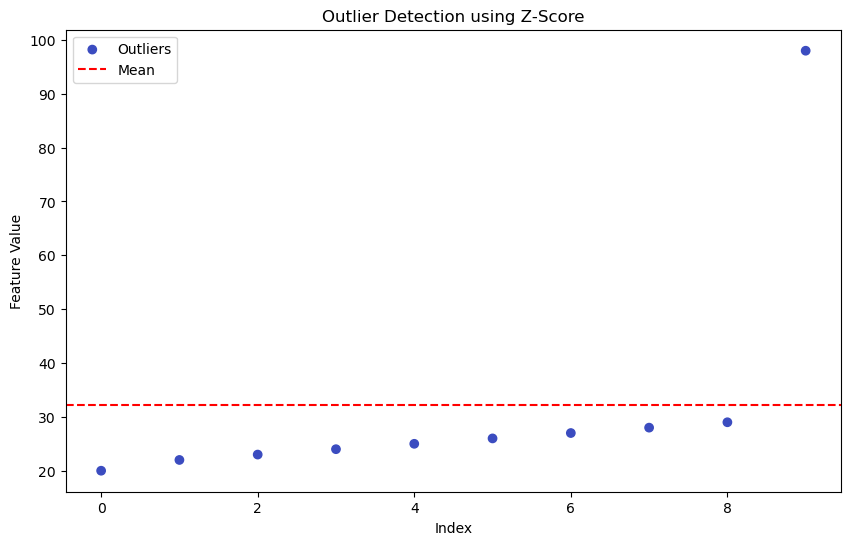

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
df = pd.read_csv("/Users/Alqama/Downloads/heart (2).csv")  # Replace with your dataset path

# Example DataFrame
df = pd.DataFrame({
    'feature': [20, 22, 23, 24, 25, 26, 27, 28, 29, 98]  # Sample data with an outlier
})

# Calculate Z-Scores
df['z_score'] = stats.zscore(df['feature'])

# Identify outliers
df['is_outlier'] = np.abs(df['z_score']) > 3

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['feature'], c=df['is_outlier'], cmap='coolwarm', label='Outliers')
plt.axhline(y=df['feature'].mean(), color='r', linestyle='--', label='Mean')
plt.title('Outlier Detection using Z-Score')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

In [97]:
# seperating the data and labels
X = heart_df.drop(columns = 'target', axis=1)
Y = heart_df['target']

In [47]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [49]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [51]:
X.shape

(1025, 13)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify=Y, random_state=2)

In [55]:
Y_train.count()

820

In [57]:
Y_train.value_counts()

target
1    421
0    399
Name: count, dtype: int64

In [59]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0
586,64,1,2,125,309,0,1,131,1,1.8,1,0,3
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2
462,52,1,3,118,186,0,0,190,0,0.0,1,0,1
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3


In [61]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [63]:
#training the model

In [65]:
classifier = svm.SVC(kernel='linear')

In [67]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [69]:
# model evaluation

In [71]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [73]:
training_data_accuracy

0.8695121951219512

In [77]:
# Building a predictive system

input_data = (68,1,3,121,284,1,0,150,2,1.8,2,1,3)
input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)
 
prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print("the person is not heart disease affected")
else:
    print("the person is heart disease affected")

[ 68.    1.    3.  121.  284.    1.    0.  150.    2.    1.8   2.    1.
   3. ]
[[ 68.    1.    3.  121.  284.    1.    0.  150.    2.    1.8   2.    1.
    3. ]]
[0]
the person is not heart disease affected


C:\Users\Alqama\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [79]:
for column in X.columns:
   print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


In [81]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [83]:
import pickle

In [1]:
fileName = "savedModels/Heart.sav"

In [2]:
pickle.dump(classifier, open(fileName,'wb'))

NameError: name 'pickle' is not defined

In [89]:
loaded_model = pickle.load(open(fileName, 'rb'))

In [95]:
input_data = (54,0,4,126,304,1,0,141,1,2.2,4,0,1)
# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshaping the array as predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print("The person is not heart disease affected")
else:
    print("the person is heart disease affected")

[1]
the person is heart disease affected


C:\Users\Alqama\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Load your dataset
df = pd.read_csv('/Users/Alqama/Downloads/heart (2).csv')

# Compute Z-scores for each column
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Set a threshold for outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)
outlier_indices = set(outliers[0])  # Getting unique indices

# Print the indices of outliers
print("Outlier indices:", outlier_indices)

Outlier indices: {128, 641, 393, 521, 267, 14, 526, 151, 665, 158, 417, 290, 294, 296, 428, 685, 686, 175, 559, 688, 179, 52, 54, 55, 958, 319, 192, 831, 450, 833, 69, 326, 329, 970, 208, 464, 465, 83, 340, 597, 348, 734, 481, 993, 996, 613, 359, 743, 749, 242, 246, 889, 378, 123, 508, 893}
